In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pandas.read_csv('Desktop/uber-raw-data-sep14.csv')

In [4]:
data.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [5]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [6]:
data.tail()

,Date/Time,Lat,Lon,Base
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764


In [7]:
def get_date(dt):
    return dt.day
data['date'] = data['Date/Time'].map(get_date)

In [8]:
def get_weekday(dt):
    return dt.weekday()
data['weekday'] = data['Date/Time'].map(get_weekday)

In [9]:
def get_hour(dt):
    return dt.hour
data['hours'] = data['Date/Time'].map(get_hour)

In [10]:
data.tail()

,Date/Time,Lat,Lon,Base,date,weekday,hours
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,30,1,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,30,1,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,30,1,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,30,1,22
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,30,1,22


Text(0.5, 1.0, 'Frequency by Date - uber - Sep 2014')

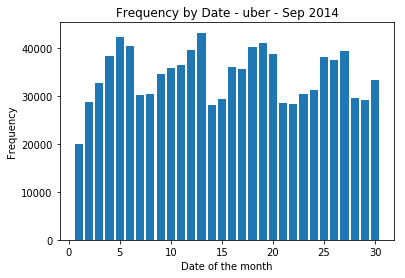

In [12]:
hist(data.date, bins=30, rwidth=0.8, range=(0.5,30.5))
xlabel('Date of the month')
ylabel('Frequency')
title('Frequency by Date - uber - Sep 2014')

In [13]:
def count_rows(rows):
    return len(rows)
num = data.groupby('date').apply(count_rows)
num

date
1     19961
2     28831
3     32631
4     38360
5     42319
6     40520
7     30134
8     30360
9     34560
10    35910
11    36439
12    39540
13    43205
14    28122
15    29454
16    36092
17    35531
18    40274
19    41017
20    38864
21    28620
22    28312
23    30316
24    31301
25    38203
26    37504
27    39468
28    29656
29    29201
30    33431
dtype: int64

In [14]:
s = num.sort_values()

In [15]:
s

date
1     19961
14    28122
22    28312
21    28620
2     28831
29    29201
15    29454
28    29656
7     30134
23    30316
8     30360
24    31301
3     32631
30    33431
9     34560
17    35531
10    35910
16    36092
11    36439
26    37504
25    38203
4     38360
20    38864
27    39468
12    39540
18    40274
6     40520
19    41017
5     42319
13    43205
dtype: int64

Text(0.5, 1.0, 'Frequency by DoM - uber - Sep 2014')

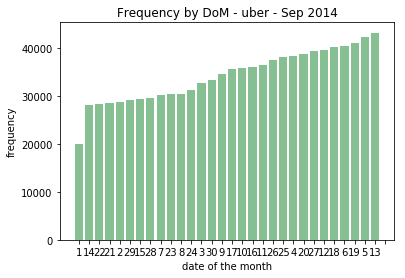

In [16]:
bar(range(0,30), s,color='#86bf91')
xticks(range(0,31), s.index)
xlabel('date of the month')
ylabel('frequency')
title('Frequency by DoM - uber - Sep 2014')

(array([24133., 16107., 10702., 10789., 12675., 20262., 33307., 43314.,
        44477., 38542., 37634., 38821., 39193., 45042., 52643., 61219.,
        68224., 73373., 75040., 69660., 63988., 60606., 51817., 36568.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 24 Patch objects>)

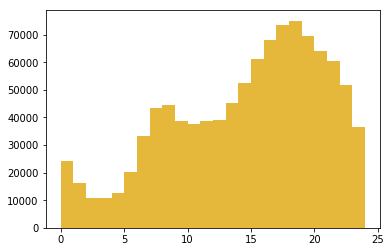

In [17]:
hist(data.hours, bins=24, range=(0, 24),color='#e5b73b')

([<matplotlib.axis.XTick at 0x1980bc24438>,
 <a list of 7 Text xticklabel objects>)

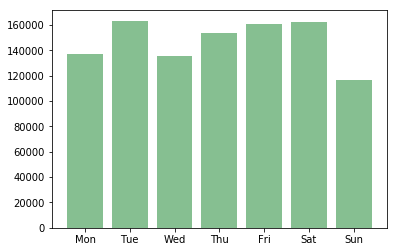

In [18]:
hist(data.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#86bf91')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())

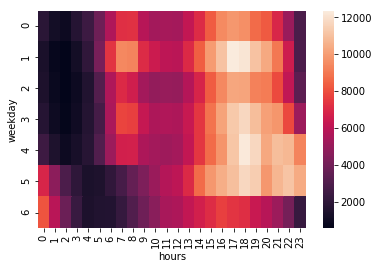

In [19]:
cross = data.groupby('weekday hours'.split()).apply(count_rows).unstack()
seaborn.heatmap(cross)